<a href="https://colab.research.google.com/github/CyperVoid/all-simplified-ml-labs/blob/main/exam_friendly_ml5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Point x51 (value: 0.7620) classified as Class2
Point x52 (value: 0.6111) classified as Class2
Point x53 (value: 0.8112) classified as Class2
Point x54 (value: 0.7404) classified as Class2
Point x55 (value: 0.2229) classified as Class1
Point x56 (value: 0.0433) classified as Class1
Point x57 (value: 0.1654) classified as Class1
Point x58 (value: 0.1019) classified as Class1
Point x59 (value: 0.2946) classified as Class1
Point x60 (value: 0.2055) classified as Class1
Point x61 (value: 0.2155) classified as Class1
Point x62 (value: 0.7030) classified as Class2
Point x63 (value: 0.8771) classified as Class2
Point x64 (value: 0.6775) classified as Class2
Point x65 (value: 0.7123) classified as Class2
Point x66 (value: 0.8675) classified as Class2
Point x67 (value: 0.2863) classified as Class1
Point x68 (value: 0.9098) classified as Class2
Point x69 (value: 0.0911) classified as Class1
Point x70 (value: 0.2160) classified as Class1
Point x71 (value: 0.7688) classified as Class2
Point x72 (va

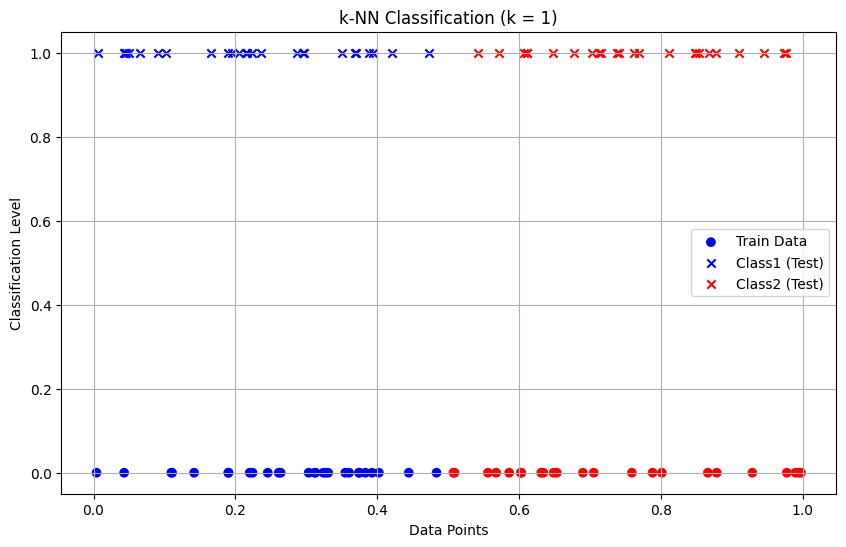

Point x51 (value: 0.7620) classified as Class2
Point x52 (value: 0.6111) classified as Class2
Point x53 (value: 0.8112) classified as Class2
Point x54 (value: 0.7404) classified as Class2
Point x55 (value: 0.2229) classified as Class1
Point x56 (value: 0.0433) classified as Class1
Point x57 (value: 0.1654) classified as Class1
Point x58 (value: 0.1019) classified as Class1
Point x59 (value: 0.2946) classified as Class1
Point x60 (value: 0.2055) classified as Class1
Point x61 (value: 0.2155) classified as Class1
Point x62 (value: 0.7030) classified as Class2
Point x63 (value: 0.8771) classified as Class2
Point x64 (value: 0.6775) classified as Class2
Point x65 (value: 0.7123) classified as Class2
Point x66 (value: 0.8675) classified as Class2
Point x67 (value: 0.2863) classified as Class1
Point x68 (value: 0.9098) classified as Class2
Point x69 (value: 0.0911) classified as Class1
Point x70 (value: 0.2160) classified as Class1
Point x71 (value: 0.7688) classified as Class2
Point x72 (va

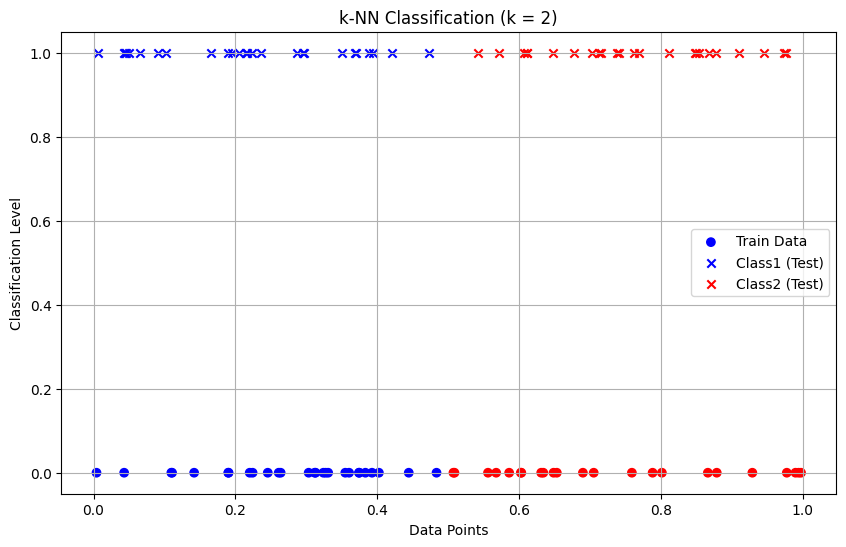

Point x51 (value: 0.7620) classified as Class2
Point x52 (value: 0.6111) classified as Class2
Point x53 (value: 0.8112) classified as Class2
Point x54 (value: 0.7404) classified as Class2
Point x55 (value: 0.2229) classified as Class1
Point x56 (value: 0.0433) classified as Class1
Point x57 (value: 0.1654) classified as Class1
Point x58 (value: 0.1019) classified as Class1
Point x59 (value: 0.2946) classified as Class1
Point x60 (value: 0.2055) classified as Class1
Point x61 (value: 0.2155) classified as Class1
Point x62 (value: 0.7030) classified as Class2
Point x63 (value: 0.8771) classified as Class2
Point x64 (value: 0.6775) classified as Class2
Point x65 (value: 0.7123) classified as Class2
Point x66 (value: 0.8675) classified as Class2
Point x67 (value: 0.2863) classified as Class1
Point x68 (value: 0.9098) classified as Class2
Point x69 (value: 0.0911) classified as Class1
Point x70 (value: 0.2160) classified as Class1
Point x71 (value: 0.7688) classified as Class2
Point x72 (va

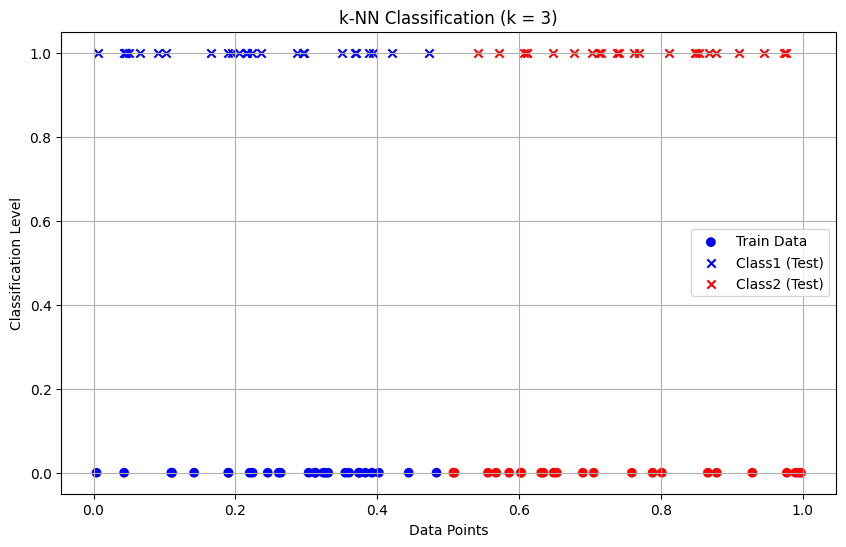

Point x51 (value: 0.7620) classified as Class2
Point x52 (value: 0.6111) classified as Class2
Point x53 (value: 0.8112) classified as Class2
Point x54 (value: 0.7404) classified as Class2
Point x55 (value: 0.2229) classified as Class1
Point x56 (value: 0.0433) classified as Class1
Point x57 (value: 0.1654) classified as Class1
Point x58 (value: 0.1019) classified as Class1
Point x59 (value: 0.2946) classified as Class1
Point x60 (value: 0.2055) classified as Class1
Point x61 (value: 0.2155) classified as Class1
Point x62 (value: 0.7030) classified as Class2
Point x63 (value: 0.8771) classified as Class2
Point x64 (value: 0.6775) classified as Class2
Point x65 (value: 0.7123) classified as Class2
Point x66 (value: 0.8675) classified as Class2
Point x67 (value: 0.2863) classified as Class1
Point x68 (value: 0.9098) classified as Class2
Point x69 (value: 0.0911) classified as Class1
Point x70 (value: 0.2160) classified as Class1
Point x71 (value: 0.7688) classified as Class2
Point x72 (va

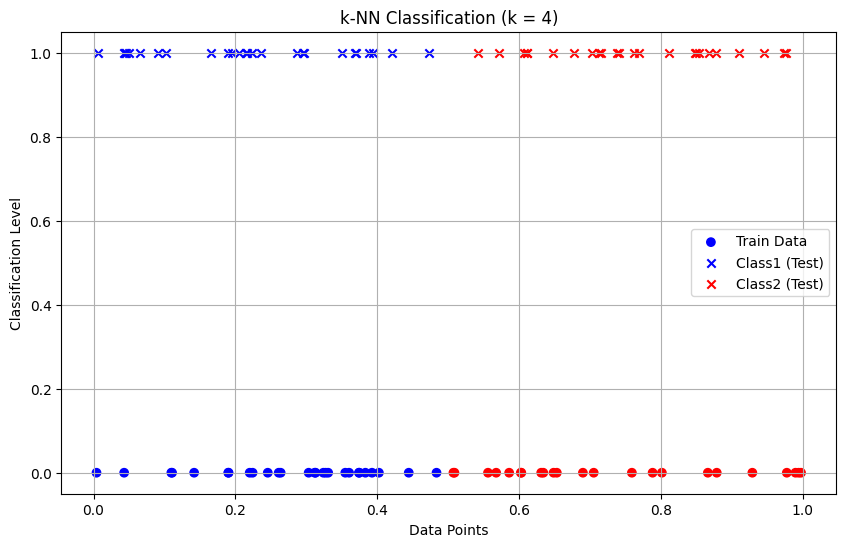

Point x51 (value: 0.7620) classified as Class2
Point x52 (value: 0.6111) classified as Class2
Point x53 (value: 0.8112) classified as Class2
Point x54 (value: 0.7404) classified as Class2
Point x55 (value: 0.2229) classified as Class1
Point x56 (value: 0.0433) classified as Class1
Point x57 (value: 0.1654) classified as Class1
Point x58 (value: 0.1019) classified as Class1
Point x59 (value: 0.2946) classified as Class1
Point x60 (value: 0.2055) classified as Class1
Point x61 (value: 0.2155) classified as Class1
Point x62 (value: 0.7030) classified as Class2
Point x63 (value: 0.8771) classified as Class2
Point x64 (value: 0.6775) classified as Class2
Point x65 (value: 0.7123) classified as Class2
Point x66 (value: 0.8675) classified as Class2
Point x67 (value: 0.2863) classified as Class1
Point x68 (value: 0.9098) classified as Class2
Point x69 (value: 0.0911) classified as Class1
Point x70 (value: 0.2160) classified as Class1
Point x71 (value: 0.7688) classified as Class2
Point x72 (va

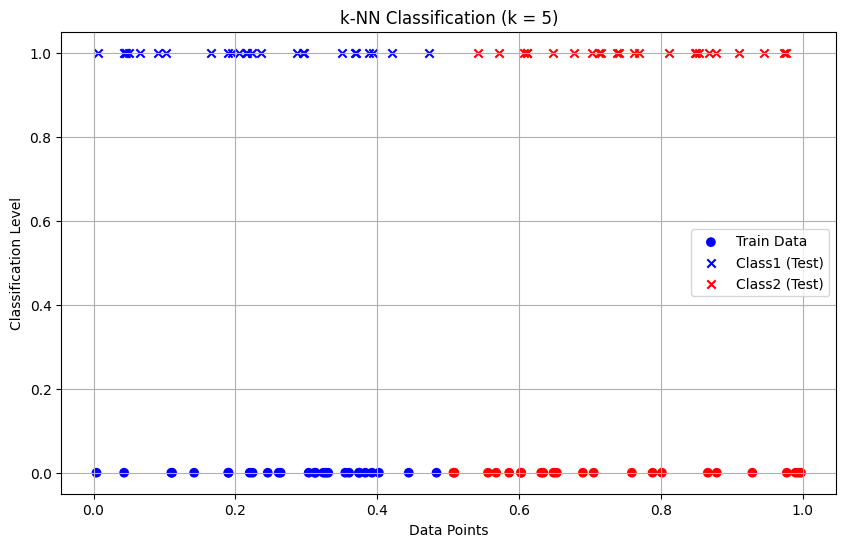

Point x51 (value: 0.7620) classified as Class2
Point x52 (value: 0.6111) classified as Class2
Point x53 (value: 0.8112) classified as Class2
Point x54 (value: 0.7404) classified as Class2
Point x55 (value: 0.2229) classified as Class1
Point x56 (value: 0.0433) classified as Class1
Point x57 (value: 0.1654) classified as Class1
Point x58 (value: 0.1019) classified as Class1
Point x59 (value: 0.2946) classified as Class1
Point x60 (value: 0.2055) classified as Class1
Point x61 (value: 0.2155) classified as Class1
Point x62 (value: 0.7030) classified as Class2
Point x63 (value: 0.8771) classified as Class2
Point x64 (value: 0.6775) classified as Class2
Point x65 (value: 0.7123) classified as Class2
Point x66 (value: 0.8675) classified as Class2
Point x67 (value: 0.2863) classified as Class1
Point x68 (value: 0.9098) classified as Class2
Point x69 (value: 0.0911) classified as Class1
Point x70 (value: 0.2160) classified as Class1
Point x71 (value: 0.7688) classified as Class2
Point x72 (va

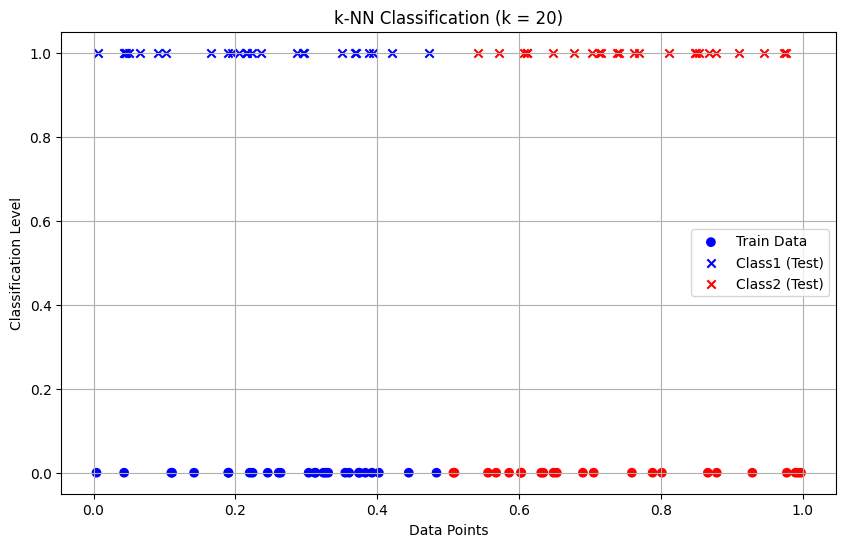

Point x51 (value: 0.7620) classified as Class2
Point x52 (value: 0.6111) classified as Class2
Point x53 (value: 0.8112) classified as Class2
Point x54 (value: 0.7404) classified as Class2
Point x55 (value: 0.2229) classified as Class1
Point x56 (value: 0.0433) classified as Class1
Point x57 (value: 0.1654) classified as Class1
Point x58 (value: 0.1019) classified as Class1
Point x59 (value: 0.2946) classified as Class1
Point x60 (value: 0.2055) classified as Class1
Point x61 (value: 0.2155) classified as Class1
Point x62 (value: 0.7030) classified as Class2
Point x63 (value: 0.8771) classified as Class2
Point x64 (value: 0.6775) classified as Class2
Point x65 (value: 0.7123) classified as Class2
Point x66 (value: 0.8675) classified as Class2
Point x67 (value: 0.2863) classified as Class1
Point x68 (value: 0.9098) classified as Class2
Point x69 (value: 0.0911) classified as Class1
Point x70 (value: 0.2160) classified as Class1
Point x71 (value: 0.7688) classified as Class2
Point x72 (va

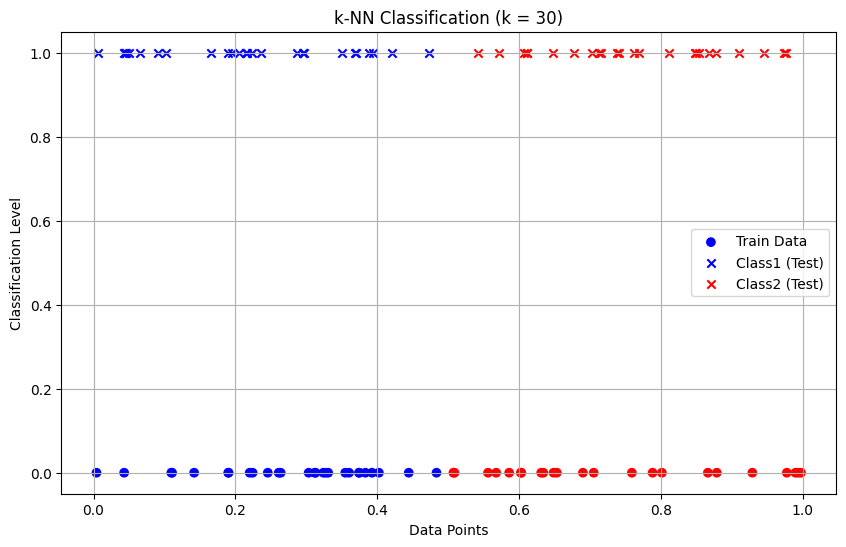

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Generate synthetic data and labels
data = np.random.rand(100)
labels = ["Class1" if x <= 0.5 else "Class2" for x in data[:50]]

# Euclidean distance function
def euclidean_distance(x1, x2):
    return abs(x1 - x2)

# k-NN Classifier
def knn_classifier(train_data, train_labels, test_point, k):
    distances = [(euclidean_distance(test_point, train_data[i]), train_labels[i]) for i in range(len(train_data))]
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]

# Split data into train and test sets
train_data = data[:50]
train_labels = labels
test_data = data[50:]

# Test k values
k_values = [1, 2, 3, 4, 5, 20, 30]
results = {}

# Classify and store results for each k
for k in k_values:
    classified_labels = [knn_classifier(train_data, train_labels, test_point, k) for test_point in test_data]
    results[k] = classified_labels

    # Print classified results for each test point
    for i, label in enumerate(classified_labels, start=51):
        print(f"Point x{i} (value: {test_data[i - 51]:.4f}) classified as {label}")

    # Plot the classification results
    class1_points = [test_data[i] for i in range(len(test_data)) if classified_labels[i] == "Class1"]
    class2_points = [test_data[i] for i in range(len(test_data)) if classified_labels[i] == "Class2"]

    plt.figure(figsize=(10, 6))
    plt.scatter(train_data, [0] * len(train_data), c=["blue" if label == "Class1" else "red" for label in train_labels], label="Train Data", marker="o")
    plt.scatter(class1_points, [1] * len(class1_points), c="blue", label="Class1 (Test)", marker="x")
    plt.scatter(class2_points, [1] * len(class2_points), c="red", label="Class2 (Test)", marker="x")
    plt.title(f"k-NN Classification (k = {k})")
    plt.xlabel("Data Points")
    plt.ylabel("Classification Level")
    plt.legend()
    plt.grid(True)
    plt.show()

